In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import scqubits as scq
import pandas as pd
from matplotlib.animation import FuncAnimation
import scipy.constants as sconst
from tqdm import tqdm
%matplotlib widget

In [2]:
def hamiltonian(Ec, Ej, N, ng):
    """
    Return the charge qubit hamiltonian as a Qobj instance.
    """
    m = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2) + 0.5 * Ej * (np.diag(-np.ones(2*N), 1) + 
                                                               np.diag(-np.ones(2*N), -1))
                                                               
    return qt.Qobj(m)

def Hc(Ec, N, ng):
    
    m = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2) 
    
    return qt.Qobj(m)

def Hj(Ej, N, ng):
    
    m = 0.5 * Ej * (np.diag(-np.ones(2*N), 1) + np.diag(-np.ones(2*N), -1))
    
    return qt.Qobj(m)

# 2-Level System Decoherence using Qutip

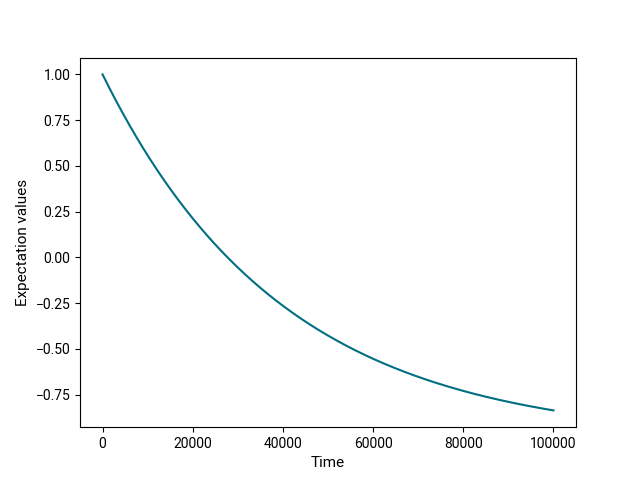

In [45]:
def qubit_hamiltonian(wq):
    return qt.Qobj(0.5 * wq * qt.sigmaz())

H = qubit_hamiltonian(2.1)
psi0 = qt.basis(2, 0)

T1 = 200
T2 = 95

G1 = 1/T1
G2 = 1/T2
GPhi = G2 - G1/2




times = np.linspace(0.0, 100000.0, 10000)
result = qt.mesolve(H, psi0, times,[G1* qt.sigmam(), GPhi * qt.sigmaz()], [qt.sigmaz(), qt.sigmax()])
fig, ax = plt.subplots()
ax.plot(times, result.expect[0]) 
#ax.plot(times, result.expect[1]) 
ax.set_xlabel('Time')
ax.set_ylabel('Expectation values') 
#ax.set_yscale("log")
plt.show()



Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]